In [ ]:
!wget http://sguangwang.com/dataset/telecom.zip
!unzip /content/telecom.zip
import pandas as pd
import torch
import numpy as np
df=pd.read_excel("/content/dataset-telecom/data_6.1~6.30_.xlsx")

--2024-02-14 22:48:10--  http://sguangwang.com/dataset/telecom.zip
Resolving sguangwang.com (sguangwang.com)... 182.50.151.114
Connecting to sguangwang.com (sguangwang.com)|182.50.151.114|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53432897 (51M) [application/x-zip-compressed]
Saving to: ‘telecom.zip’

telecom.zip         100%[===================>]  50.96M  13.5MB/s    in 5.3s    

2024-02-14 22:48:16 (9.59 MB/s) - ‘telecom.zip’ saved [53432897/53432897]

Archive:  /content/telecom.zip
  inflating: dataset-telecom/data_6.1~6.30_.xlsx  


In [ ]:
def get_x(value):
    if isinstance(value, str):
        return float(value.split("/")[0])
    elif isinstance(value, float):
        return value
def get_y(value):
    if isinstance(value, str):
        return float(value.split("/")[1])
    elif isinstance(value, float):
        return value

df_origin = df.copy()
df['x'] = df['location(latitude/lontitude)'].apply(get_x)
df['y'] = df['location(latitude/lontitude)'].apply(get_y)

df = df.drop(columns=['start time','end time','month','date','location(latitude/lontitude)','user id'])
df= df.dropna(axis='index')
df = df.drop_duplicates(subset=['x'])
n_stations = len(df)
df, n_stations

(                x           y
 0       31.237872  121.470259
 14      31.246946  121.513919
 15      31.232877  121.487530
 28      31.227933  121.453610
 50      31.235682  121.487831
 ...           ...         ...
 591720  31.286523  121.538876
 592841  31.254745  121.556081
 597119  31.224006  121.423572
 599554  31.209070  121.436851
 602860  31.246433  121.443184
 
 [2753 rows x 2 columns],
 2753)

In [ ]:
# Import necessary packages
import os
import folium
from folium import plugins
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es

map = folium.Map(location=[31.407957656070998, 121.51657824568781],
                  tiles = 'cartodbpositron',
                 zoom_start=12)
kw = {"prefix": "fa", "color": "red", "icon": "tower-cell", "icon_color": "white", "angle": "0"}
for i in range(n_stations):
  icon_station = folium.Icon(**kw)
  folium.Marker(location=[df.iloc[i]['x'], df.iloc[i]['y']], icon=icon_station, popup='test').add_to(map)
map

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Convert DataFrame to GeoDataFrame
geometry = [Point(lon, lat) for lon, lat in zip(df['y'], df['x'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

# Save GeoDataFrame as GeoJSON file
output_file = 'stations.geojson'
gdf.to_file(output_file, driver='GeoJSON')

data_stations = os.path.join('stations.geojson')

In [75]:
from scipy.spatial import Voronoi, voronoi_plot_2d
from geojson import FeatureCollection, Feature, Polygon

coords = []
for i in range(n_stations):
  coords.append([df.iloc[i]['x'],df.iloc[i]['y']])

vor = Voronoi(coords, qhull_options='Qbb Qc Qx')

point_voronoi_list = []
feature_list = []
for region in range(len(vor.regions)):
    vertex_list = []
    for x in vor.regions[region]:
        if x == -1:
            break;
        else:
            #Get the vertex out of the list, and flip the order for folium:
            vertex = vor.vertices[x]
            vertex = (vertex[1], vertex[0])
        vertex_list.append(vertex)
    #Save the vertex list as a polygon and then add to the feature_list:
    polygon = Polygon([vertex_list])
    feature = Feature(geometry=polygon, properties={})
    feature_list.append(feature)

vorJSON = open('stations.geojson', 'w')
feature_collection = FeatureCollection(feature_list)
print(feature_collection, file=vorJSON)
vorJSON.close()

folium.GeoJson(data_stations, name='Stations-Vor').add_to(map)
map.save('Map.html')

NameError: name 'n_stations' is not defined

### **TOP 500 STATIONS**

In [ ]:
df_best = df_origin.groupby(['location(latitude/lontitude)']).count()
df_best = df_best.drop(columns=['month','start time','end time','user id'])
df_best = df_best.sort_values(by=['date'],ascending=False)

df_best

month  date  start time  end time  user id
location(latitude/lontitude)                                            
22.522803/114.218796            354   354         354       354      354
24.284812/102.999068            147   147         147       147      147
25.222206/117.086322             28    28          28        28       28
26.139329/103.078562           1242  1242        1242      1242     1242
26.215115/109.744661            311   311         311       311      311
...                             ...   ...         ...       ...      ...
41.677262/125.960124              6     6           6         6        6
41.835279/123.498927             51    51          51        51       51
46.247857/128.762232             54    54          54        54       54
46.777465/131.812182            330   330         330       330      330
47.35092/130.301233               1     1           1         1        1

[2769 rows x 5 columns]

[date    20.0
 dtype: float64,
 date    33.0
 dtype: float64,
 date    43.0
 dtype: float64,
 date    52.0
 dtype: float64,
 date    59.0
 dtype: float64,
 date    66.0
 dtype: float64,
 date    72.0
 dtype: float64,
 date    76.0
 dtype: float64,
 date    81.0
 dtype: float64,
 date    84.0
 dtype: float64,
 date    87.0
 dtype: float64,
 date    90.0
 dtype: float64,
 date    92.0
 dtype: float64,
 date    94.0
 dtype: float64,
 date    96.0
 dtype: float64,
 date    97.0
 dtype: float64,
 date    98.0
 dtype: float64,
 date    99.0
 dtype: float64,
 date    99.0
 dtype: float64,
 date    100.0
 dtype: float64,
 date    100.0
 dtype: float64,
 date    100.0
 dtype: float64,
 date    100.0
 dtype: float64,
 date    100.0
 dtype: float64,
 date    100.0
 dtype: float64,
 date    100.0
 dtype: float64,
 date    100.0
 dtype: float64]

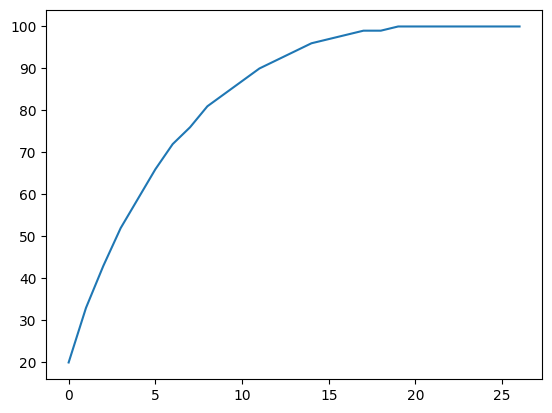

In [82]:
import matplotlib.pyplot as plt

result = []
acc = 0
for k in range(100,len(df_best),100):
  acc = np.ceil(100*df_best[:k].sum()/df_best.sum())
  result.append(acc)

plt.plot(result)

In [83]:
list_index = df_best[:900].index
df_top_best = pd.DataFrame(list_index)
df_top_best['x'] = df_top_best['location(latitude/lontitude)'].apply(get_x)
df_top_best['y'] = df_top_best['location(latitude/lontitude)'].apply(get_y)
df_top_best

location(latitude/lontitude)          x           y
0            31.160079/121.37079  31.160079  121.370790
1           31.159304/121.358718  31.159304  121.358718
2           31.051898/121.769904  31.051898  121.769904
3           31.146311/121.399951  31.146311  121.399951
4           31.146522/121.352501  31.146522  121.352501
..                           ...        ...         ...
895         31.288777/121.390078  31.288777  121.390078
896         31.185812/121.457923  31.185812  121.457923
897         30.873326/121.284335  30.873326  121.284335
898         31.202118/121.395128  31.202118  121.395128
899         31.137143/121.545715  31.137143  121.545715

[900 rows x 3 columns]

In [85]:
# Import necessary packages
import os
import folium
from folium import plugins
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es

map_best = folium.Map(location=[31.407957656070998, 121.51657824568781],
                  tiles = 'cartodbpositron',
                 zoom_start=12)
kw = {"prefix": "fa", "color": "red", "icon": "tower-cell", "icon_color": "white", "angle": "0"}
for i in range(len(df_top_best)):
  icon_station = folium.Icon(**kw)
  folium.Marker(location=[df_top_best.iloc[i]['x'], df_top_best.iloc[i]['y']], icon=icon_station, popup='test').add_to(map_best)
map_best

In [86]:
import geopandas as gpd
from shapely.geometry import Point

# Convert DataFrame to GeoDataFrame
geometry = [Point(lon, lat) for lon, lat in zip(df_top_best['y'], df_top_best['x'])]
gdf_top_best = gpd.GeoDataFrame(df_top_best, geometry=geometry, crs='EPSG:4326')

# Save GeoDataFrame as GeoJSON file
output_file = 'top_stations.geojson'
gdf_top_best.to_file(output_file, driver='GeoJSON')

data_stations_top_best = os.path.join('top_stations.geojson')

In [87]:
from scipy.spatial import Voronoi, voronoi_plot_2d
from geojson import FeatureCollection, Feature, Polygon

coords_top_best = []
for i in range(len(df_top_best)):
  coords_top_best.append([df_top_best.iloc[i]['x'],df_top_best.iloc[i]['y']])

vor_top_best = Voronoi(coords_top_best, qhull_options='Qbb Qc Qx')

point_voronoi_list_top_best= []
feature_list_top_best = []
for region in range(len(vor_top_best.regions)):
    vertex_list_top_best = []
    for x in vor_top_best.regions[region]:
        if x == -1:
            break;
        else:
            #Get the vertex out of the list, and flip the order for folium:
            vertex = vor_top_best.vertices[x]
            vertex = (vertex[1], vertex[0])
        vertex_list_top_best.append(vertex)
    #Save the vertex list as a polygon and then add to the feature_list:
    polygon_top_best = Polygon([vertex_list_top_best])
    feature_top_best = Feature(geometry=polygon_top_best, properties={})
    feature_list_top_best.append(feature_top_best)

vorJSON_top_best = open('top_stations.geojson', 'w')
feature_collection_top_best = FeatureCollection(feature_list_top_best)
print(feature_collection_top_best, file=vorJSON_top_best)
vorJSON_top_best.close()

folium.GeoJson(data_stations_top_best, name='Top-Stations-Vor').add_to(map_best)
map_best.save('map_best.html')